# Análise Exploratória

## Importando Bibliotecas

In [57]:
import pandas as pd
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [58]:
#importando o dataset e transformando em lista
data = pd.read_csv('./patientdataV6.csv', sep=",")
data.head()

,AVGHEARTBEATSPERMIN,PALPITATIONSPERDAY,CHOLESTEROL,BMI,HEARTFAILURE,AGE,SEX,FAMILYHISTORY,SMOKERLAST5YRS,EXERCISEMINPERWEEK
0,93,22,163,25,N,49,F,N,N,110
1,108,22,181,24,N,32,F,N,N,192
2,86,0,239,20,N,60,F,N,N,121
3,80,36,164,31,Y,45,F,Y,N,141
4,66,36,185,23,N,39,F,N,N,63


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10800 entries, 0 to 10799
Data columns (total 10 columns):
AVGHEARTBEATSPERMIN    10800 non-null int64
PALPITATIONSPERDAY     10800 non-null int64
CHOLESTEROL            10800 non-null int64
BMI                    10800 non-null int64
HEARTFAILURE           10800 non-null object
AGE                    10800 non-null int64
SEX                    10800 non-null object
FAMILYHISTORY          10800 non-null object
SMOKERLAST5YRS         10800 non-null object
EXERCISEMINPERWEEK     10800 non-null int64
dtypes: int64(6), object(4)
memory usage: 843.8+ KB


Vemos que o dataset apresenta 9 features sendo elas 4 categóricas e 5 numéricas. O dataset não apresenta nenhum missing value, portanto não precisamos nos preocupar com esse tratamento.

### Variáveis categóricas

In [60]:
data.describe(include=['object'])

,HEARTFAILURE,SEX,FAMILYHISTORY,SMOKERLAST5YRS
count,10800,10800,10800,10800
unique,2,2,2,2
top,N,M,N,N
freq,9012,5454,8811,10378


Vemos que o dataset possui 4 variáveis categóricas incluindo o target "HEARTFAILURE", que define se uma pessoa teve ou não insuficiência cardíaca. 

### Variáveis numéricas

In [61]:
data.describe()

,AVGHEARTBEATSPERMIN,PALPITATIONSPERDAY,CHOLESTEROL,BMI,AGE,EXERCISEMINPERWEEK
count,10800.000000,10800.000000,10800.000000,10800.000000,10800.000000,10800.000000
mean,87.115093,20.423148,195.080278,26.359722,49.965185,119.729537
std,19.744375,12.165320,26.136732,3.820147,13.079281,71.147060
min,48.000000,0.000000,150.000000,20.000000,28.000000,0.000000
25%,72.000000,10.000000,173.000000,23.000000,39.000000,58.000000
50%,85.000000,20.000000,196.000000,26.000000,50.000000,119.000000
75%,100.000000,31.000000,217.000000,30.000000,61.000000,180.000000
max,161.000000,45.000000,245.000000,34.000000,72.000000,250.000000


Nas variáveis numéricas vemos que duas delas são referentes a resultados de exames (PALPITATIONSPERDAY e CHOLESTEROL) e as outras são informações a serem medidas no momento da consulta ou respondidas pelo próprio paciente. 

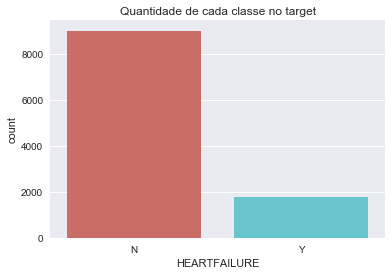

In [62]:
sns.countplot(x='HEARTFAILURE',data=data, palette='hls');
plt.title('Quantidade de cada classe no target');

Vemos que o nosso target está desbalanceado, portanto devemos ter atenção para realizar possíveis tratamentos caso necessário. 

In [63]:
onlyHF = data.loc[data['HEARTFAILURE'] == 'Y']
onlyHF.head()

,AVGHEARTBEATSPERMIN,PALPITATIONSPERDAY,CHOLESTEROL,BMI,HEARTFAILURE,AGE,SEX,FAMILYHISTORY,SMOKERLAST5YRS,EXERCISEMINPERWEEK
3,80,36,164,31,Y,45,F,Y,N,141
11,134,7,228,34,Y,63,F,Y,N,92
30,104,39,234,23,Y,45,F,N,N,31
37,62,14,207,28,Y,40,M,N,N,161
43,63,10,210,33,Y,53,F,N,N,145


In [64]:
onlyHF.count()

AVGHEARTBEATSPERMIN    1788
PALPITATIONSPERDAY     1788
CHOLESTEROL            1788
BMI                    1788
HEARTFAILURE           1788
AGE                    1788
SEX                    1788
FAMILYHISTORY          1788
SMOKERLAST5YRS         1788
EXERCISEMINPERWEEK     1788
dtype: int64

## PCA
### Não há diferença relevante entre os autovalores da matriz de correlação, o que faz com que as features NÃO categóricas do problema possam ser consideradas como independentes. Sem poder reduzir a dimensão.

In [65]:
#avalição das Componentes Principais via autovalor e autovetor da matriz de correlação

from numpy import linalg as LA
M_Cor_data = data.corr()

eigval, eigvec = LA.eig(M_Cor_data)
print('autovalores: \n{}, \n\nautovetores: \n{}'.format(eigval, eigvec))

autovalores: 
[1.08515194 0.94012254 0.97169933 1.01513164 0.9986617  0.98923284], 

autovetores: 
[[ 0.50831963  0.49844513 -0.49274386  0.11754199 -0.47005468  0.12489829]
 [ 0.34067741  0.31994831  0.14373841 -0.19781836  0.65220227  0.54443673]
 [ 0.19528787 -0.01860677 -0.36573603  0.49970845  0.56446608 -0.50933595]
 [ 0.62808423 -0.74476673  0.05569738  0.06821558 -0.10416346  0.17951916]
 [ 0.03195053 -0.16182696 -0.51248633 -0.79536707  0.1368458  -0.24251477]
 [-0.43806628 -0.26071801 -0.58054757  0.24511447  0.07404089  0.58096938]]


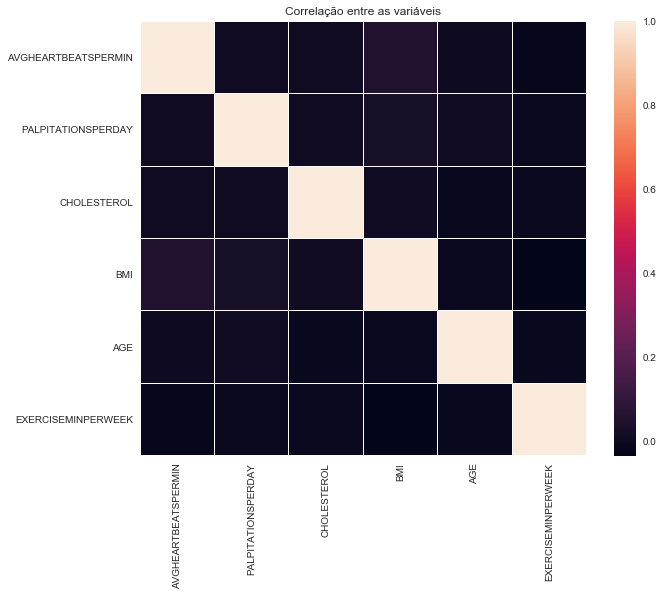

In [66]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    data.corr(), linewidths=.01)
plt.title('Correlação entre as variáveis')
plt.show()

A análise feita para o método PCA pode ser confirmada pela matriz de correlação acima, onde as variáveis não apresentam correlação entre si.

## Gráfico de Barras e Histogramas

#### Variáveis catagóricas

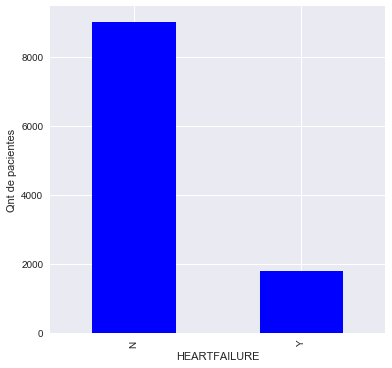

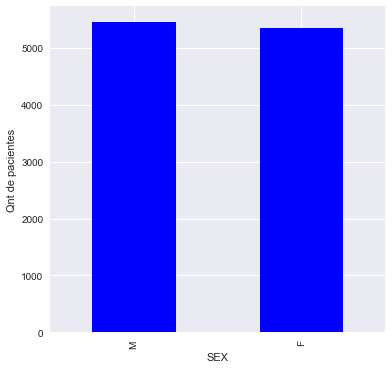

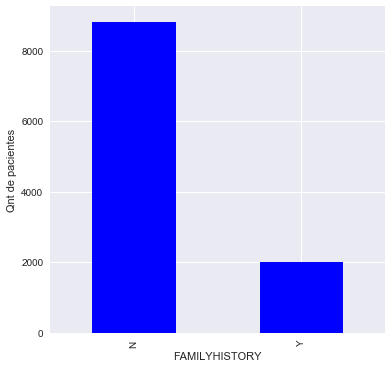

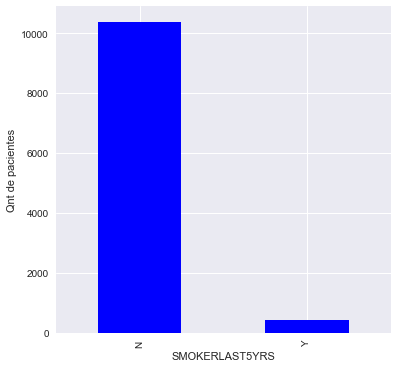

In [40]:
def plot_bars(hf, cols):
    for col in cols:
        fig = plt.figure(figsize=(6,6)) # define plot area
        ax = fig.gca() # define axis    
        counts = hf[col].value_counts() # find the counts for each unique category
        counts.plot.bar(ax = ax, color = 'blue') # Use the plot.bar method on the counts data frame
        #ax.set_title('Quantidade de pacientes por: ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel('Qnt de pacientes')# Set text for y axis
        plt.show()

plot_cols = ['HEARTFAILURE','SEX', 'FAMILYHISTORY', 'SMOKERLAST5YRS']
plot_bars(data, plot_cols)

#### Variáveis numéricas

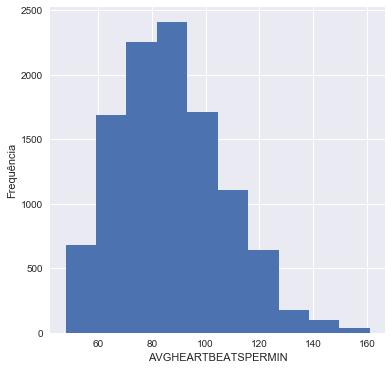

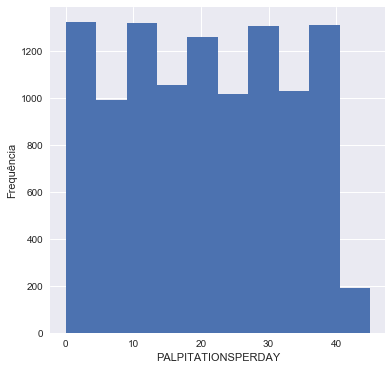

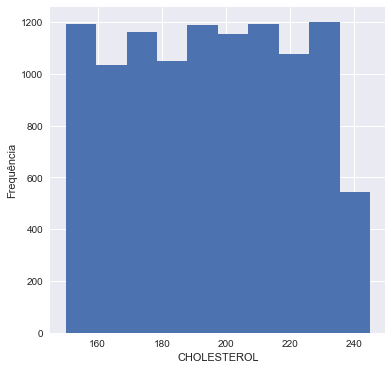

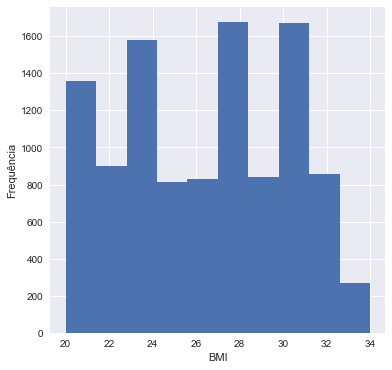

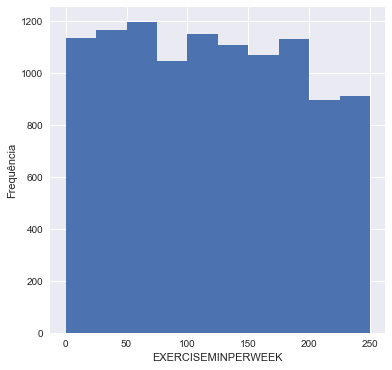

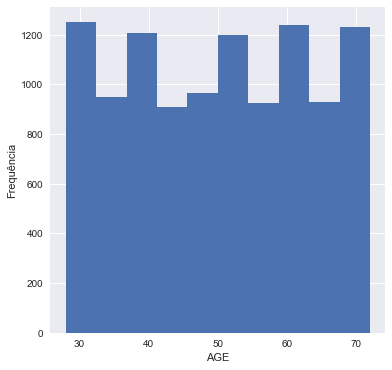

In [41]:
def plot_histogram(auto_prices, cols, bins = 10):
    for col in cols:
        fig = plt.figure(figsize=(6,6)) # define plot area
        ax = fig.gca() # define axis    
        auto_prices[col].plot.hist(ax = ax, bins = bins) # Use the plot.hist method on subset of the data frame
        #ax.set_title('Histogram of ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel('Frequência')# Set text for y axis
        plt.show()
        
num_cols = ['AVGHEARTBEATSPERMIN','PALPITATIONSPERDAY','CHOLESTEROL','BMI','EXERCISEMINPERWEEK', 'AGE']    
plot_histogram(data, num_cols)

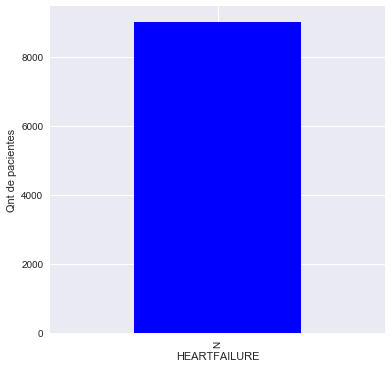

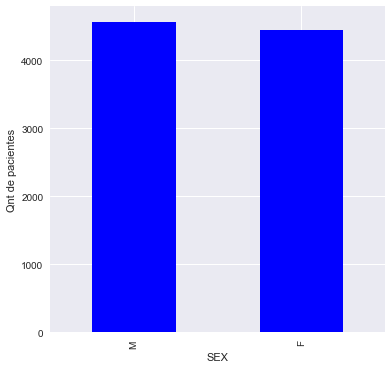

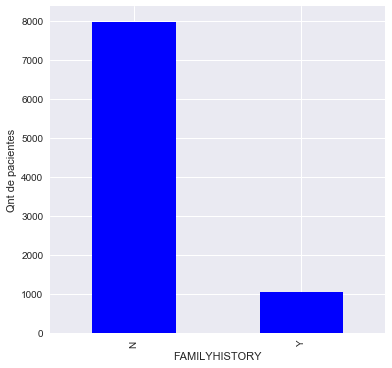

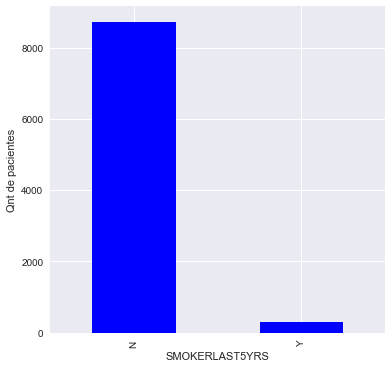

In [42]:
noHF = data.loc[data['HEARTFAILURE'] == 'N']
plot_bars(noHF, plot_cols)

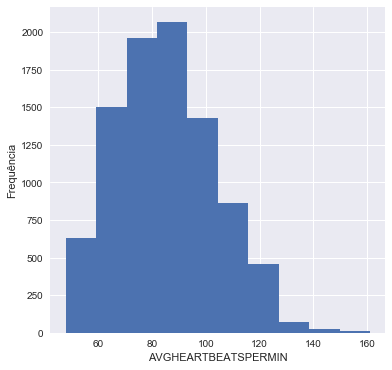

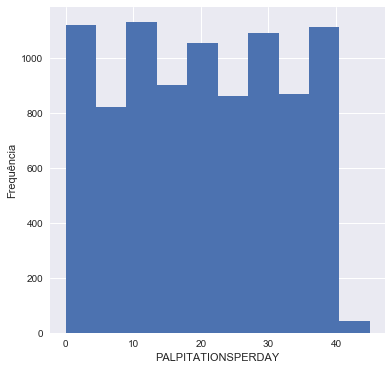

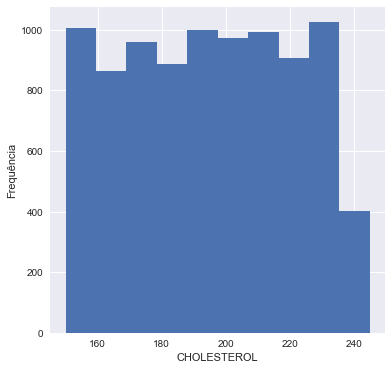

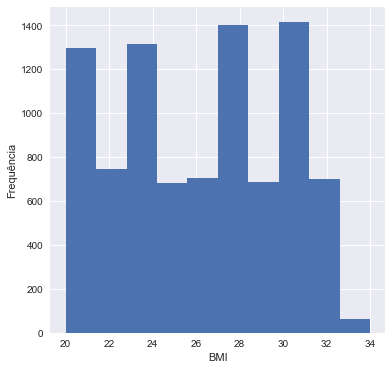

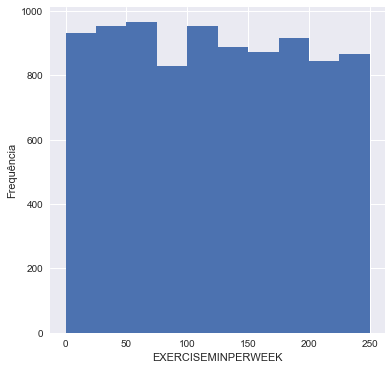

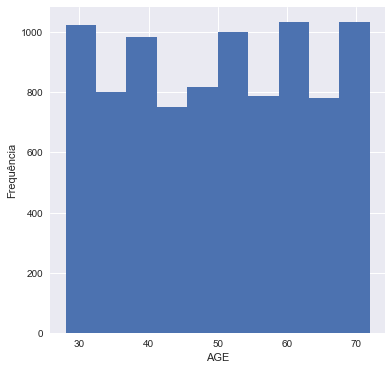

In [43]:
plot_histogram(noHF, num_cols)

## Verificação de outliers por BoxPlot

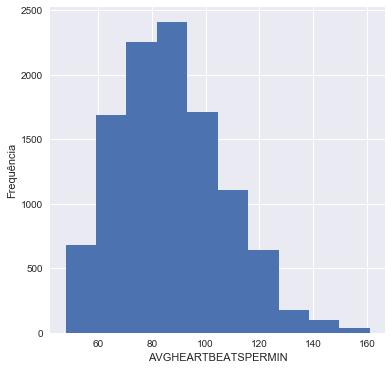

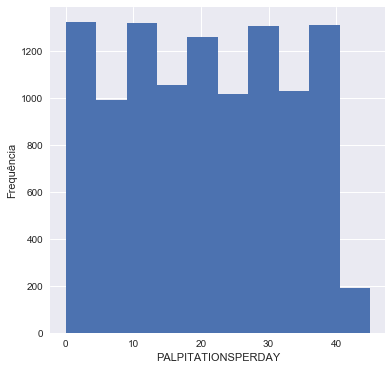

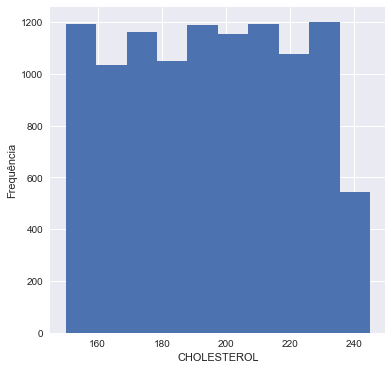

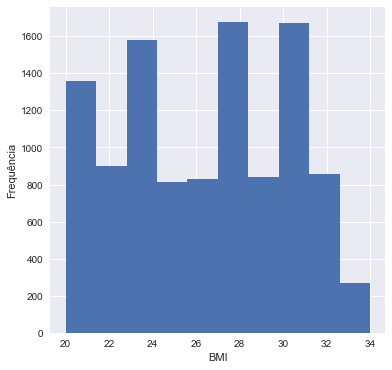

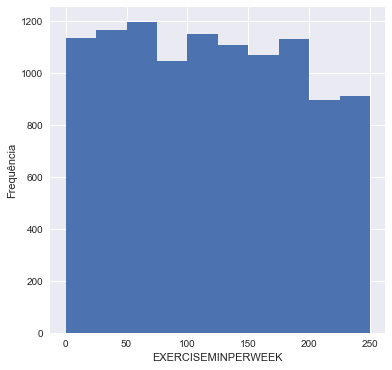

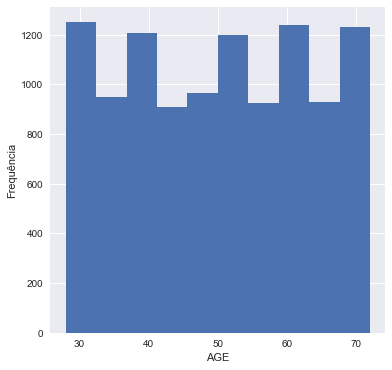

In [44]:
def plot_boxplot(auto_prices, cols, bins = 10):
    for col in cols:
        fig = plt.figure(figsize=(6,6)) # define plot area
        ax = fig.gca() # define axis    
        auto_prices[col].plot.hist(ax = ax, bins = bins) # Use the plot.hist method on subset of the data frame
        #ax.set_title('Histogram of ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel('Qnt de Pacientes')# Set text for y axis
        plt.show()
        
num_cols = ['AVGHEARTBEATSPERMIN','PALPITATIONSPERDAY','CHOLESTEROL','BMI','EXERCISEMINPERWEEK', 'AGE']    
plot_histogram(data, num_cols)

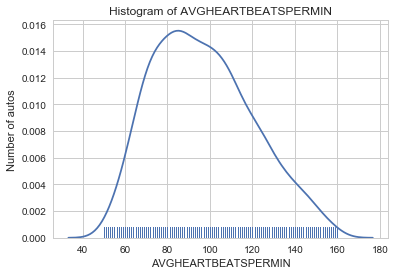

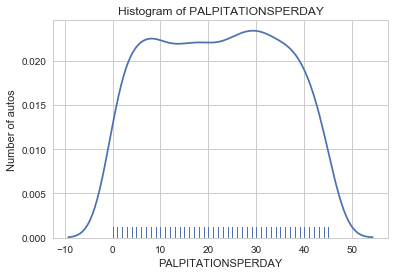

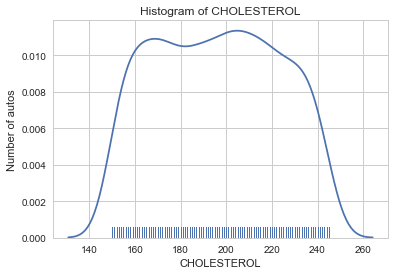

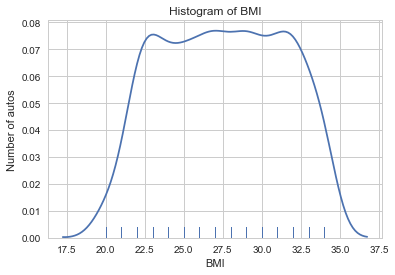

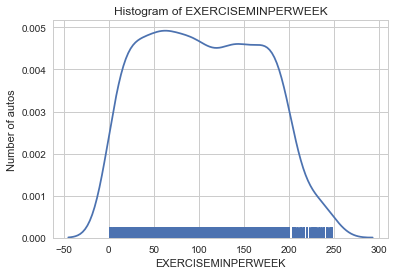

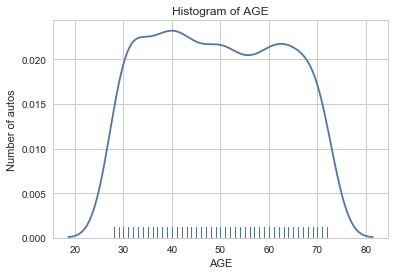

In [45]:
def plot_density_hist(auto_prices, cols, bins = 10, hist = False):
    for col in cols:
        sns.set_style("whitegrid")
        sns.distplot(auto_prices[col], bins = bins, rug=True, hist = hist)
        plt.title('Histogram of ' + col) # Give the plot a main title
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel('Number of autos')# Set text for y axis
        plt.show()
        
plot_density_hist(onlyHF, num_cols)

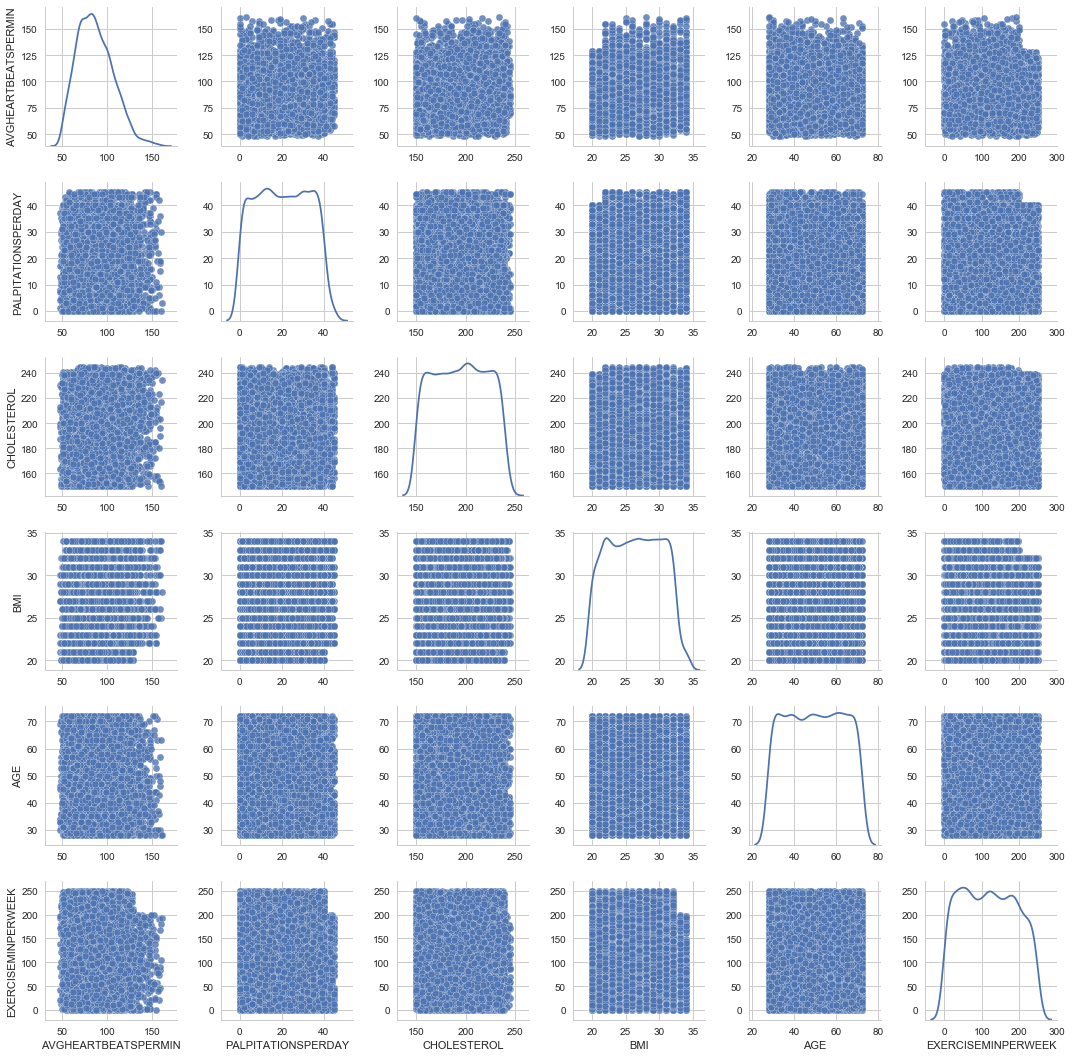

In [46]:
sns.pairplot(data,diag_kind='kde', plot_kws={'alpha':0.8})

O plot acima mostra a relação por pares entre cada feature. O gráfico serviu para eliminar a escolha do algoritmo de mistura de gaussianas, pois apesar da variância aparentar ser uma distribuição gaussiana, as outras variáveis do problema não estão distantes ente si pela métrica Mahalonabis o que representaria elipses ou círculos (kmeans) nas curvas de nível. 

## Box plot de variáveis categóricas

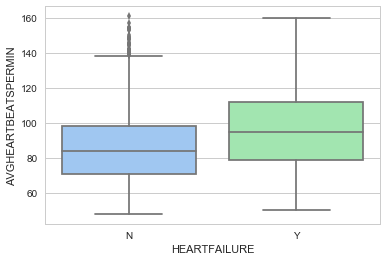

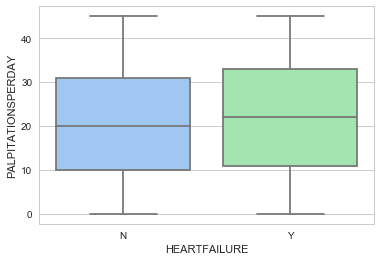

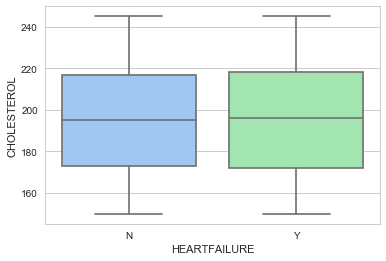

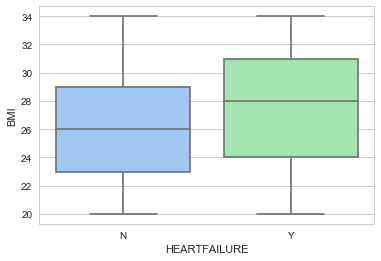

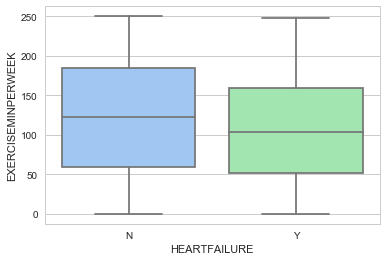

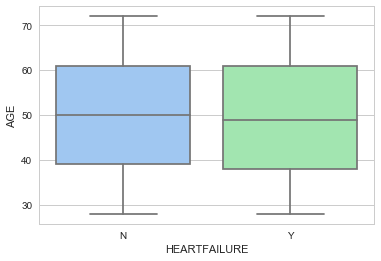

In [47]:
def plot_box(credit, cols, col_x = 'HEARTFAILURE'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.set_palette("pastel")
        sns.boxplot(col_x, col, data=credit)
        plt.xlabel(col_x) # Set text for the x axis
        plt.ylabel(col)# Set text for y axis
        plt.show()

plot_box(data, num_cols)

Usamos o boxplot para a verificação de outliers no nosso dataset, por se tratar da padronização das features usando o método z-score. Dessa forma verificamos que existem alguns poucos outliers apenas para a variável AVGHEARTBEATSPERMIN, o que consideramos irrelevante para o problema dada a amostragem da feature. 

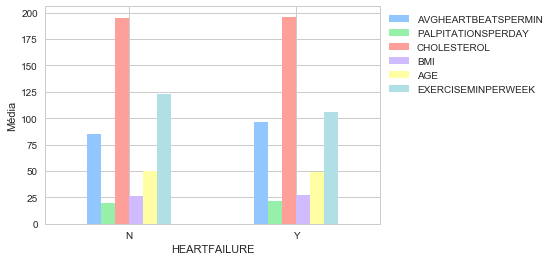

In [50]:
# print the mean for each column by species
data.groupby(by = "HEARTFAILURE").mean()
# plot for mean of each feature for each label class
data.groupby(by = "HEARTFAILURE").mean().plot(kind="bar")
#plt.title('Class vs Measurements')

plt.ylabel('Média')
plt.xticks(rotation=0) # manage the xticks rotation
plt.grid(True)

# Use bbox_to_anchor option to place the legend outside plot area to be tidy
plt.legend(loc="upper left", bbox_to_anchor=(1,1))

Gráfico representativo das médias de cada feature em relação ao target.

# Criação do modelo

## Importando as bibliotecas

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
import seaborn as sns

## Carregando os dados


In [74]:
df = pd.read_csv("patientdataV6.csv")

Como vimos na análise exploratória que as variáveis catóricas apresentam apenas 2 possíveis valores, podemos usar dicionários para fazer o one hot encoding, por simplicidade.

In [75]:
df.HEARTFAILURE.value_counts()

dict_hf = {'N': 0, 'Y': 1}
df['TARGET'] = df.HEARTFAILURE.map(dict_hf)

df.drop('HEARTFAILURE',axis=1,inplace=True)

In [76]:
df.SEX.value_counts()

dict_gender = {'F': 0, 'M': 1}
df.SEX = df.SEX.map(dict_gender)

In [77]:
df.FAMILYHISTORY.value_counts()

dict_fh = {'N': 0, 'Y': 1}
df.FAMILYHISTORY = df.FAMILYHISTORY.map(dict_fh)

In [78]:
df.SMOKERLAST5YRS.value_counts()

dict_smk = {'N': 0, 'Y': 1}
df.SMOKERLAST5YRS = df.SMOKERLAST5YRS.map(dict_smk)

In [79]:
df.head()

,AVGHEARTBEATSPERMIN,PALPITATIONSPERDAY,CHOLESTEROL,BMI,AGE,SEX,FAMILYHISTORY,SMOKERLAST5YRS,EXERCISEMINPERWEEK,TARGET
0,93,22,163,25,49,0,0,0,110,0
1,108,22,181,24,32,0,0,0,192,0
2,86,0,239,20,60,0,0,0,121,0
3,80,36,164,31,45,0,1,0,141,1
4,66,36,185,23,39,0,0,0,63,0


## Função para validar o modelo usando a técnica holdout

In [80]:
def holdout_val_model(X, y, model, test_size=0.3):
    # Divide o dataset em treino e validação
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=42)

    #     model = RandomForestClassifier()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print('Modelo base no conjunto de TREINO: ',
          str(model).split('(')[0], '\nPrecisão: {0:.5f}'.format(
              precision_score(y_test, y_pred)), '\nRecall: {0:.5f}'.format(
                  recall_score(y_test, y_pred)), '\nAUC: {0:.5f}'.format(
                      roc_auc_score(y_test, y_pred)),
          '\nAcurácia: {0:.5f}'.format(accuracy_score(y_test, y_pred)), '\n')

    c_matrix_log = confusion_matrix(
        y_test, y_pred, labels=[0, 1])
    sns.heatmap(
        c_matrix_log, annot=True, fmt="d")
    plt.title('Matriz de confusão')

    print(classification_report(y_test, y_pred))

### Importanto algumas bibliotecas para treinar e validar os modelos

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [82]:
rf = RandomForestClassifier(random_state=42)
lr = LogisticRegression(random_state=42)
XGB = XGBClassifier(random_state=42)
LGBM = LGBMClassifier(random_state=42)
CatBoost = CatBoostClassifier(random_state=42)

### Separando as features e o target 

In [84]:
y = df.TARGET
X = df.drop(['TARGET'], axis=1)

## Feature importances 
Podemos fazer uma análise rápida e exploratória da importância das features utilizando o algoritmo random forest. 

In [85]:
from sklearn.ensemble import RandomForestClassifier
rf_imp = RandomForestClassifier(n_estimators=150, max_depth=8, min_samples_leaf=4, max_features=0.2, n_jobs=-1, random_state=0)
rf_imp.fit(X, y)
features = X.columns.values

In [87]:
def get_feature_importance_df(feature_importances, column_names, top_n=42):
    imp_dict = dict(zip(column_names, feature_importances))
    top_features = sorted(imp_dict, key=imp_dict.get, reverse=True)[0:top_n]
    top_importances = [imp_dict[feature] for feature in top_features]
    df = pd.DataFrame(data={
        'feature': top_features,
        'importance': top_importances
    })
    return df

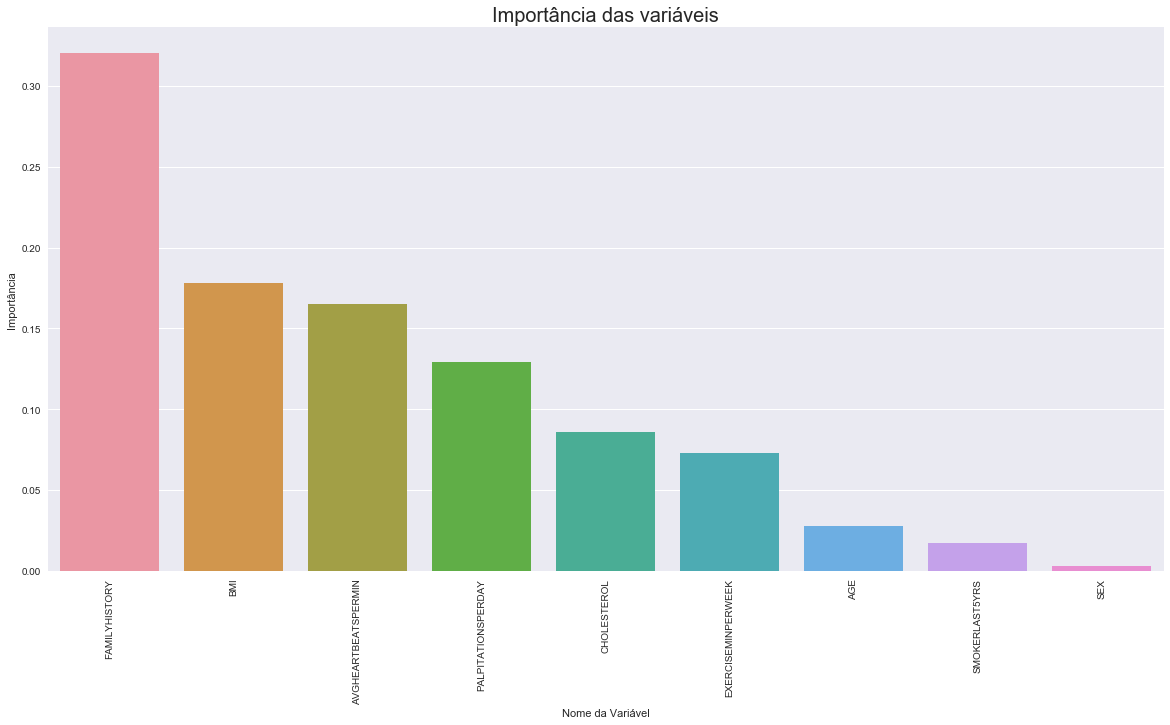

In [88]:
feature_importance = get_feature_importance_df(rf_imp.feature_importances_, features)
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sns.barplot(
    data=feature_importance,
    x="feature",
    y="importance",
    ax=ax
)
ax.set(
    xlabel='Nome da Variável',
    ylabel='Importância',
    title="Importância das variáveis")
ax.title.set_fontsize("20")
plt.xticks(
    np.arange(feature_importance.shape[0]),
    feature_importance.feature.values,
    rotation=90)
plt.show()

Vemos através do algoritmo de feature_importances do random forest que algumas features parecem ter mais representatividade que as outras. Porém, deve-se ter cuidado ao analisar e utilizar essa informação pois não necessáriamente devemos exculir as piores features, uma vez que isso poderia alterar a importância das outras features. A princípio não iremos realizar nenhuma ação em relação a essa análise. 



## Modelo baseline
Vamos treinar o modelo baseline sem fazer nenhuma manipulação nos dados. Utilizaremos o random forest para esse treinamento.

Modelo base no conjunto de TREINO:  RandomForestClassifier 
Precisão: 0.68182 
Recall: 0.34759 
AUC: 0.65681 
Acurácia: 0.85895 

             precision    recall  f1-score   support

          0       0.88      0.97      0.92      2679
          1       0.68      0.35      0.46       561

avg / total       0.84      0.86      0.84      3240



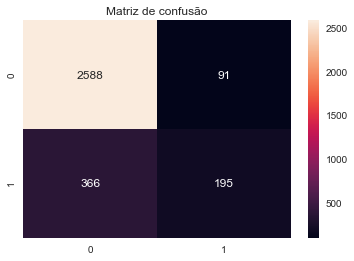

In [89]:
holdout_val_model(X,y,rf)

Notamos que o algoritmos apresenta boa acurácia, porém não podemos considerar a acurácia como uma boa métrica, uma vez que o dataset está muito desbalanceado. O recall será a métrica que escolhemos para o projeto, pois queremos acertar o máximo de pacientes que tem a doença. Além disso a técnica holdout não é uma boa técnica para esse dataset, uma vez que ele apresenta muito poucas linhas fazendo necessário técnicas mais robustas como o k-fold. 

### Bibliotecas para balancear o dataset


In [90]:
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
import warnings

### Função para holdout com balanceamento

In [95]:
def holdout_imb_val_model(X, y, classifier, test_size=0.3):
    warnings.filterwarnings('ignore')
    # Divide o dataset em treino e validação
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=42)
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.fit_transform(X_test)
    #     model = RandomForestClassifier()
    imb_model = classifier.fit(X_train, y_train)
    y_pred = imb_model.predict(X_test)

    smote_pipeline = make_pipeline(SMOTE(random_state=42), classifier)
    smote_model = smote_pipeline.fit(X_train, y_train)
    X_smote_test = X_test
    y_smote_test = y_test

    smote_y_pred = smote_model.predict(X_smote_test)

    nm_pipeline = make_pipeline(NearMiss(random_state=42), classifier)
    nm_model = nm_pipeline.fit(X_train, y_train)
    X_nm_test = X_test
    y_nm_test = y_test
    nm_y_pred = nm_model.predict(X_nm_test)
    
    print('Modelo base no conjunto de TREINO: ',
          str(classifier).split('(')[0], '\nPrecisão: {0:.5f}'.format(
              precision_score(y_test, y_pred)), '\nRecall: {0:.5f}'.format(
                  recall_score(y_test, y_pred)), '\nAUC: {0:.5f}'.format(
                      roc_auc_score(y_test, y_pred)),
          '\nAcurácia: {0:.5f}'.format(accuracy_score(y_test, y_pred)), '\n')
    print(classification_report(y_test, y_pred))
    print('\n\n')

    print(
        'Modelo base no conjunto de TREINO com rebalanceamento SMOTE: ',
        str(classifier).split('(')[0], '\nPrecisão: {0:.5f}'.format(
            precision_score(y_smote_test,
                            smote_y_pred)), '\nRecall: {0:.5f}'.format(
                                recall_score(y_smote_test, smote_y_pred)),
        '\nAUC: {0:.5f}'.format(roc_auc_score(y_smote_test, smote_y_pred)),
        '\nAcurácia: {0:.5f}'.format(
            accuracy_score(y_smote_test, smote_y_pred)), '\n')
    print(classification_report(y_smote_test, smote_y_pred))
    print('\n\n')

    print('Modelo base no conjunto de TREINO com rebalanceamento NearMiss: ',
          str(classifier).split('(')[0], '\nPrecisão: {0:.5f}'.format(
              precision_score(y_nm_test, nm_y_pred)),
          '\nRecall: {0:.5f}'.format(recall_score(y_nm_test, nm_y_pred)),
          '\nAUC: {0:.5f}'.format(roc_auc_score(
              y_nm_test, nm_y_pred)), '\nAcurácia: {0:.5f}'.format(
                  accuracy_score(y_nm_test, nm_y_pred)), '\n')
    print(classification_report(y_nm_test, nm_y_pred))
    
    c_matrix_log = confusion_matrix(
        y_nm_test, nm_y_pred, labels=[0, 1])
    sns.heatmap(
        c_matrix_log, annot=True, fmt="d")
    plt.title('Matriz de confusão')

### Função para k-fold com balanceamento

In [91]:
from collections import Counter
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

def kfold_imb_val_model(X, y, classifier, n_splits=5, used_metric = 'recall'):
    warnings.filterwarnings('ignore')
    X = np.array(X)
    y = np.array(y)

    folds = list(
        StratifiedKFold(n_splits=n_splits, shuffle=True,
                        random_state=42).split(X, y))
    metric = []
    for j, (train_idx, test_idx) in enumerate(folds):
        X_train = X[train_idx]
        y_train = y[train_idx]
        X_holdout = X[test_idx]
        y_holdout = y[test_idx]

        pipeline = make_pipeline(SMOTE(random_state=42), classifier)
        model = pipeline.fit(X_train, y_train)

        cross_score = cross_val_score(
            model, X_holdout, y_holdout, cv=5, scoring=used_metric)
        metric.append(100 * (cross_score.mean()))
    print("%s with SMOTE " % (str(classifier).split('(')[0]))
    print(used_metric+": %.2f%% (+/- %.2f%%)" % (np.mean(metric), np.std(metric)),
          '\n')

### Treinando os modelos 

In [93]:
metrics = ['precision','recall']
models = [lr,rf,XGB,LGBM]
for model in models:
    for metric in metrics:
        kfold_imb_val_model(X,y,model, used_metric=metric)

LogisticRegression with SMOTE 
precision: 42.79% (+/- 1.28%) 

LogisticRegression with SMOTE 
recall: 61.08% (+/- 1.97%) 

RandomForestClassifier with SMOTE 
precision: 55.56% (+/- 4.23%) 

RandomForestClassifier with SMOTE 
recall: 37.41% (+/- 3.59%) 

XGBClassifier with SMOTE 
precision: 57.60% (+/- 2.12%) 

XGBClassifier with SMOTE 
recall: 50.85% (+/- 3.09%) 

LGBMClassifier with SMOTE 
precision: 57.73% (+/- 3.34%) 

LGBMClassifier with SMOTE 
recall: 39.71% (+/- 3.20%) 



Verificamos através da técnida K-fold e fazendo um oversampling da classe 1 (utilizando o algoritmo SMOTE que foi o que apresentou melhores resultados) que o melhor algoritmo foi a regressão logística que apresentou um recall de 61% (nosso objetivo) e uma precisão de 43%. Não é ainda o melhor modelo pois alguns tratamentos podem ser feitos nas features como agrupamento em faixas etárias e faixas de obesidade, além de definir melhor os hyperparametros de cada modelo. Outros algortimos podem ser testados também e um ensembling deles também poderia melhorar as métricas. Esses procedimentos ficam para a Fase 2 do projeto onde além da melhoria do algoritmo seria feito um estudo para input de novas features caso tivermos acesso a esses dados. Deve-se notar também que foi feita uma normalização das variáveis para melhorar os resultados em alguns algoritmos, apesar de não ser necessário para todos, como as árvores de decisão. 

Modelo base no conjunto de TREINO:  LGBMClassifier 
Precisão: 0.66377 
Recall: 0.40820 
AUC: 0.68245 
Acurácia: 0.86173 

             precision    recall  f1-score   support

          0       0.89      0.96      0.92      2679
          1       0.66      0.41      0.51       561

avg / total       0.85      0.86      0.85      3240




Modelo base no conjunto de TREINO com rebalanceamento SMOTE:  LGBMClassifier 
Precisão: 0.18371 
Recall: 0.97326 
AUC: 0.53385 
Acurácia: 0.24660 

             precision    recall  f1-score   support

          0       0.94      0.09      0.17      2679
          1       0.18      0.97      0.31       561

avg / total       0.81      0.25      0.20      3240




Modelo base no conjunto de TREINO com rebalanceamento NearMiss:  LGBMClassifier 
Precisão: 0.26826 
Recall: 0.68093 
AUC: 0.64599 
Acurácia: 0.62315 

             precision    recall  f1-score   support

          0       0.90      0.61      0.73      2679
          1       0.27      0.68    

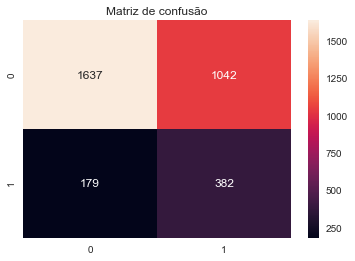

In [96]:
holdout_imb_val_model(X, y, model, test_size=0.3)

Foi gerado essa análise final utilizando a função de holdout pois queríamos ver a matriz de confusão para realizarmos cálculos financeiros que serão apresentados no pitching.